# **Predictive Modeling for Customer Churn Detection**

*(Focus on Random Forest and XGBoost)*

## 1. Introduction

Customer churn refers to the loss of customers who discontinue their relationship with a company over a specific period. In industries such as telecommunications, banking, insurance, and subscription-based services, churn directly affects revenue, profitability, and long-term sustainability. Acquiring new customers is often significantly more expensive than retaining existing ones; therefore, predicting churn in advance enables firms to implement targeted retention strategies.

Predictive modeling uses historical customer data to estimate the probability that a customer will churn. In this project, tree-based ensemble methods—Random Forest (RF) and Extreme Gradient Boosting (XGBoost)—are employed due to their strong predictive power and ability to model complex nonlinear relationships.

---

## 2. Problem Definition

The objective of this study is to develop supervised machine learning models capable of predicting whether a customer will churn. The target variable is binary, typically coded as:

* 1 = Churn
* 0 = No Churn

This constitutes a binary classification problem where the model estimates the probability of churn based on customer demographic, behavioral, and financial characteristics.

Beyond prediction accuracy, the practical goal is to identify high-risk customers early and provide actionable insights into the main drivers of churn.

---

## 3. Dataset Description

Customer churn datasets generally contain a combination of demographic, behavioral, and financial variables. Demographic variables may include age, gender, location, and income level. Behavioral variables often capture customer engagement patterns such as tenure, frequency of service usage, number of transactions, and contract type. Financial variables typically include monthly charges, total charges, billing methods, and payment behavior.

These predictors are expected to collectively explain variations in customer retention behavior. Feature engineering may also be applied to derive new meaningful variables, such as average spending per month or usage intensity ratios.

---

## 4. Data Preprocessing

Data preprocessing is a critical stage in churn modeling, as model performance heavily depends on data quality.

First, missing values must be addressed using appropriate techniques such as mean or median imputation for numerical variables and mode imputation for categorical variables. In some cases, advanced imputation methods may be applied.

Second, categorical variables must be encoded into numerical form. One-hot encoding is commonly used for nominal variables, while label encoding may be applied when there is a natural ordering.

Unlike distance-based models, tree-based models such as Random Forest and XGBoost do not require feature scaling. However, maintaining a consistent preprocessing pipeline ensures reproducibility and easier deployment.

Finally, the dataset is typically divided into training and testing sets (e.g., 70/30 or 80/20 split), ensuring that model performance is evaluated on unseen data.

---

## 5. Random Forest Model

Random Forest is an ensemble learning method based on the principle of bagging (bootstrap aggregation). It constructs multiple decision trees using different bootstrap samples of the training data. Each tree independently predicts the outcome, and the final prediction is obtained through majority voting in classification problems.

The strength of Random Forest lies in its ability to reduce variance while maintaining low bias. Because each tree is trained on a different subset of data and features, the ensemble becomes more robust and less prone to overfitting compared to a single decision tree.

Important hyperparameters include:

* Number of trees (`n_estimators`)
* Maximum tree depth (`max_depth`)
* Minimum samples required to split a node
* Maximum number of features considered at each split

Random Forest also provides measures of feature importance, allowing interpretation of key churn drivers.

---

## 6. XGBoost Model

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that builds trees sequentially. Unlike Random Forest, which builds trees independently, XGBoost constructs each new tree to correct the errors made by previous trees. This sequential learning process optimizes a differentiable loss function using gradient descent.

XGBoost is widely regarded for its high predictive accuracy and efficiency. It incorporates regularization techniques that reduce overfitting and supports parallel computation for faster training.

Key hyperparameters include:

* Learning rate (`eta`)
* Number of boosting rounds (`n_estimators`)
* Maximum tree depth
* Subsampling rate
* Column sampling rate
* Regularization parameters
* Scale positive weight (important for imbalanced datasets)

Because churn datasets are often imbalanced, XGBoost’s built-in handling of class imbalance makes it particularly suitable.

---

## 7. Handling Class Imbalance

In real-world churn datasets, the proportion of customers who churn is often significantly smaller than those who remain. This imbalance can bias models toward predicting the majority class.

Several techniques may be used to address this issue:

* Applying class weights
* Using SMOTE (Synthetic Minority Over-sampling Technique)
* Random under-sampling of the majority class
* Adjusting `scale_pos_weight` in XGBoost

The choice of method depends on dataset size and business objectives.

---

## 8. Model Evaluation

Model performance must be evaluated using metrics beyond simple accuracy, especially in imbalanced datasets. Key evaluation metrics include precision, recall, F1-score, and the area under the ROC curve (ROC-AUC).

Recall is particularly important in churn prediction because failing to identify a customer who is likely to churn (false negative) may result in revenue loss. Precision is important to avoid allocating retention resources to customers who would not have churned.

A confusion matrix provides a detailed breakdown of prediction outcomes, while lift and gain charts can help assess business impact.

---

## 9. Model Comparison and Interpretation

The final stage involves comparing Random Forest and XGBoost using consistent evaluation metrics. The comparison should assess:

* Predictive accuracy
* Sensitivity to churners
* Robustness to overfitting
* Computational efficiency

In addition to performance comparison, feature importance analysis helps identify the most influential predictors. Techniques such as permutation importance or SHAP (SHapley Additive exPlanations) values provide deeper interpretability.

Understanding which factors drive churn is as important as achieving high predictive performance, since business decisions depend on actionable insights.

---

## 10. Conclusion

Predictive modeling for customer churn detection enables organizations to proactively manage customer retention. Random Forest provides a strong baseline model due to its robustness and simplicity, while XGBoost often achieves superior predictive accuracy through gradient boosting and regularization.

By combining accurate prediction with interpretability techniques, organizations can identify high-risk customers, understand churn drivers, and design targeted interventions that enhance long-term profitability.

##### **Load the Required Libraries**

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Read the Data from Local Directory**

In [2]:
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


#### **Read the Data as Data Frame**

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Data Structure**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Convert all Object Variables to Categorical**

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Data Visualization**

/tmp/ipython-input-3948143681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


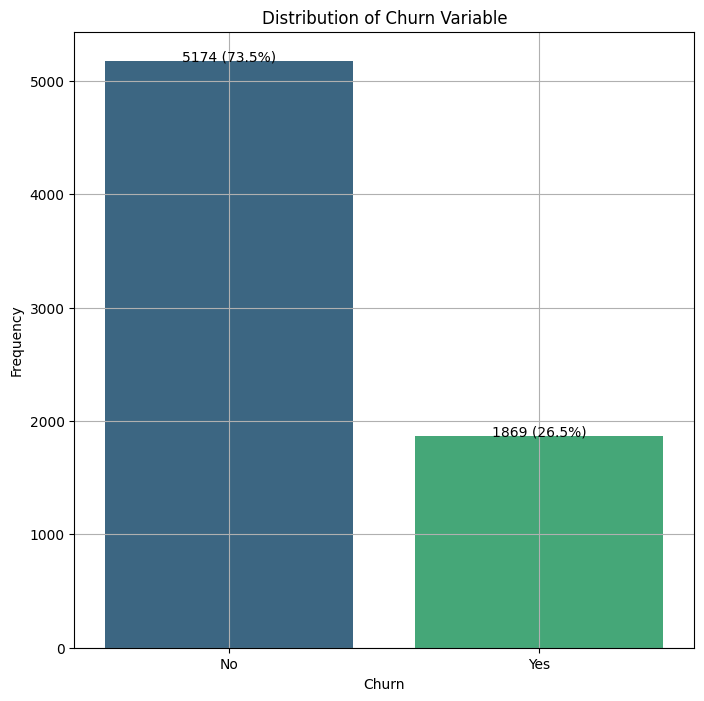

In [7]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn Variable')
plt.xlabel('Churn')
plt.ylabel('Frequency')

total = len(df['Churn'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3, # Offset to place text above the bar
            f'{int(height)} ({(height/total)*100:.1f}%)',
            ha="center")
plt.grid(True)
plt.show()

### **Comprative Bar Chart**

/tmp/ipython-input-3828989439.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_payment_method = df.groupby('PaymentMethod').size()


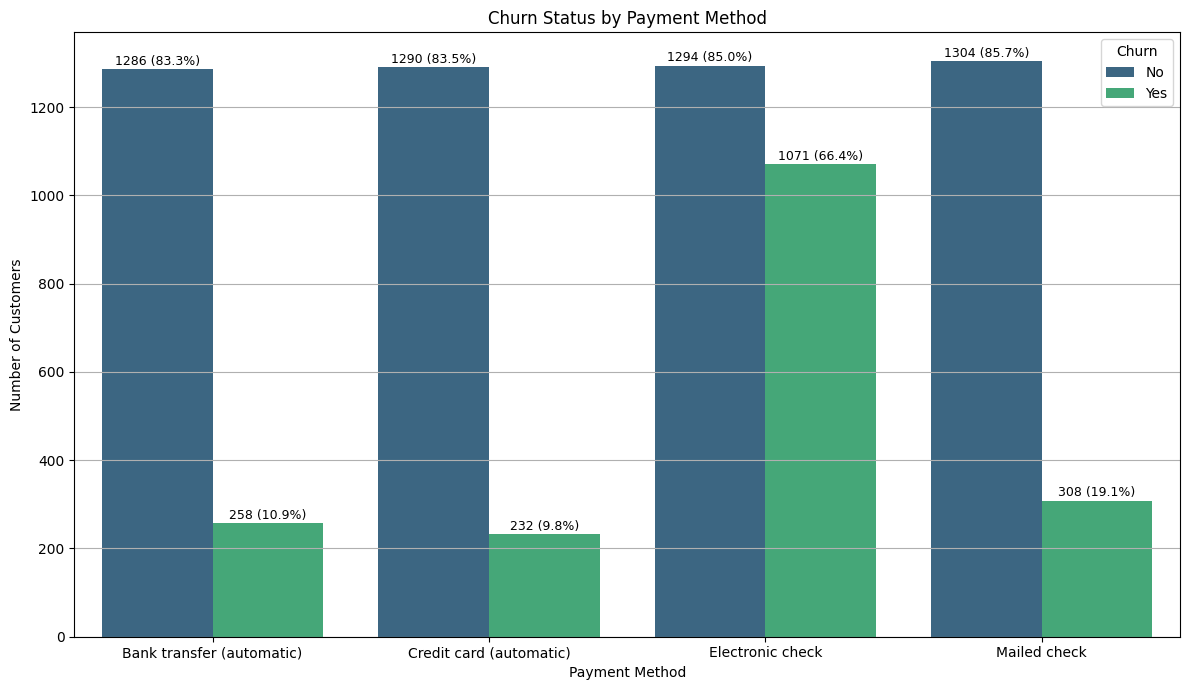

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Churn Status by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0, ha='center') # Rotate labels for better readability
plt.grid(True, axis='y')

# Calculate totals per PaymentMethod for percentage calculation
total_per_payment_method = df.groupby('PaymentMethod').size()

# Get the number of unique churn statuses (e.g., 'No', 'Yes')
num_churn_statuses = len(df['Churn'].cat.categories)

# Iterate through the bars (patches) to add text annotations
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height == 0: # Skip bars with no data
        continue

    # Determine which PaymentMethod and Churn category this bar belongs to
    # Patches are typically ordered by x-category, then by hue-category within each x-category.
    # Using .cat.categories ensures consistent ordering with seaborn's plotting.
    payment_method_idx = i // num_churn_statuses
    churn_status_idx = i % num_churn_statuses

    payment_method = df['PaymentMethod'].cat.categories[payment_method_idx]

    # Get the total number of customers for this specific payment method
    total_customers_in_method = total_per_payment_method.get(payment_method, 0)

    if total_customers_in_method > 0:
        percentage = (height / total_customers_in_method) * 100
        text = f'{int(height)} ({percentage:.1f}%)'
    else:
        text = f'{int(height)}'

    # Place the annotation slightly above the bar
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3, # Offset to place text above the bar
            text,
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

/tmp/ipython-input-534240033.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_gender = df.groupby('gender').size()


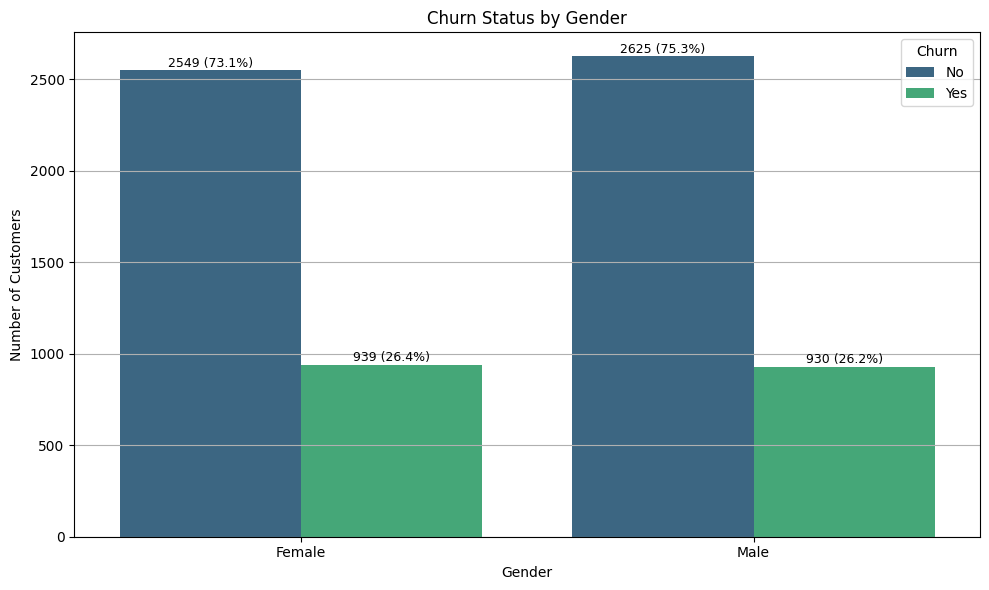

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='gender', hue='Churn', palette='viridis')
plt.title('Churn Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0, ha='center')
plt.grid(True, axis='y')

# Calculate totals per Gender for percentage calculation
total_per_gender = df.groupby('gender').size()

# Get the number of unique churn statuses (e.g., 'No', 'Yes')
num_churn_statuses = len(df['Churn'].cat.categories)

# Iterate through the bars (patches) to add text annotations
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height == 0: # Skip bars with no data
        continue

    # Determine which Gender and Churn category this bar belongs to
    # Patches are typically ordered by x-category, then by hue-category within each x-category.
    # Using .cat.categories ensures consistent ordering with seaborn's plotting.
    gender_idx = i // num_churn_statuses
    churn_status_idx = i % num_churn_statuses

    gender = df['gender'].cat.categories[gender_idx]

    # Get the total number of customers for this specific gender
    total_customers_in_gender = total_per_gender.get(gender, 0)

    if total_customers_in_gender > 0:
        percentage = (height / total_customers_in_gender) * 100
        text = f'{int(height)} ({percentage:.1f}%)'
    else:
        text = f'{int(height)}'

    # Place the annotation slightly above the bar
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3, # Offset to place text above the bar
            text,
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 🌲 **Random Forest**

## 1️⃣ Introduction

Random Forest is a **supervised machine learning algorithm** used for:

* ✅ Classification
* ✅ Regression

It is an **ensemble learning method** that builds multiple Decision Trees and combines their predictions to produce a more accurate and stable result.

Instead of relying on a single tree (which may overfit), Random Forest reduces variance by averaging many trees.

---

## 2️⃣ Why It Is Called “Random” Forest

Random Forest introduces randomness in two ways:

* 🔹 **Bootstrap Sampling** (Bagging)
  Each tree is trained on a random sample of the data (with replacement).

* 🔹 **Random Feature Selection**
  At each split, only a random subset of features is considered.

This randomness reduces overfitting and improves generalization.

---

## 3️⃣ How Random Forest Works

Step-by-step process:

1. Draw multiple bootstrap samples from the training data
2. Train a Decision Tree on each sample
3. At each node:

   * Select a random subset of features
   * Choose the best split among them
4. Repeat for many trees
5. Combine predictions:

   * **Majority vote** (classification)
   * **Average prediction** (regression)

---

## 4️⃣ Mathematical Representation

For classification:

$$
\hat{y} = \text{mode}(T_1(x), T_2(x), ..., T_n(x))
$$

For regression:

$$
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} T_i(x)
$$

Where:

* $T_i(x)$ = prediction from tree $i$
* $n$ = number of trees

---

## 5️⃣ Key Hyperparameters

| Parameter           | Description                  |
| ------------------- | ---------------------------- |
| `n_estimators`      | Number of trees              |
| `max_depth`         | Maximum tree depth           |
| `max_features`      | Number of features per split |
| `min_samples_split` | Minimum samples to split     |
| `min_samples_leaf`  | Minimum samples in leaf      |

Increasing `n_estimators` generally improves performance but increases computation time.

---

## 6️⃣ Advantages

✅ Reduces overfitting compared to a single Decision Tree
✅ Handles high-dimensional data well
✅ Works with nonlinear relationships
✅ Robust to noise and outliers
✅ Provides feature importance

---

## 7️⃣ Disadvantages

❌ Less interpretable than Decision Trees
❌ Slower than simple models
❌ Requires more memory
❌ Can be computationally expensive for large datasets

---

## 8️⃣ Feature Importance

Random Forest can rank features based on how much they reduce impurity.

In sklearn:

```python
model.feature_importances_
```

This helps identify the most influential predictors.

---

## 9️⃣ Evaluation Metrics

For classification:

* Accuracy
* Precision
* Recall
* F1-score
* AUC

For regression:

* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R² Score

---

## 🔟 Random Forest vs Decision Tree

| Feature          | Decision Tree | Random Forest |
| ---------------- | ------------- | ------------- |
| Overfitting      | High          | Low           |
| Accuracy         | Moderate      | High          |
| Interpretability | High          | Medium/Low    |
| Stability        | Low           | High          |

---

## 1️⃣1️⃣ Applications

* Customer churn prediction
* Fraud detection
* Medical diagnosis
* Credit risk modeling
* Injury prediction systems

---

# 📌 Summary

Random Forest is a powerful ensemble algorithm that:

* Combines many Decision Trees
* Uses bagging and random feature selection
* Reduces overfitting
* Produces strong predictive performance
* Provides feature importance insights

#### **Data Preprocessing**

In [10]:
##### Check for Missing Values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#### **Create the Target Variable and Features Matrix**

In [11]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [12]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [13]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#mean_total_charges = df['TotalCharges'].mean()
#df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

#### **Create Dummies**

In [14]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
X.shape

(7043, 6559)

#### **Convert One-Hot Encoding to 1 and 0**

In [16]:
X = X.astype(int)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


#### **Split the Data Into Testing and Training**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 6559)
X_test shape: (1409, 6559)
y_train shape: (5634,)
y_test shape: (1409,)


In [19]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### **View the Structure of the Data**

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6559 entries, SeniorCitizen to TotalCharges_999.9
dtypes: int64(6559)
memory usage: 352.4 MB


#### **Develope the Random Forest Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

This code creates a tuned Random Forest model that controls tree complexity, reduces overfitting, and handles class imbalance for better churn prediction.

---

```python
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
```

This code **instantiates (creates) a Random Forest classification model** using the scikit-learn library. It defines how the model should be built, but it does not train it yet.

Now let’s explain each parameter.

---

## 1️⃣ `n_estimators=300`

This tells the model to build **300 decision trees**.

Random Forest works by:

* Creating many decision trees
* Training each on a different bootstrap sample
* Combining their predictions using majority voting

More trees:

* Reduce variance
* Improve stability
* Increase computational cost

300 trees is stronger than the default 100 and usually improves performance.

---

## 2️⃣ `max_depth=10`

This limits how deep each tree can grow.

* A deeper tree learns more complex patterns.
* Too deep → overfitting.
* Too shallow → underfitting.

By limiting depth to 10:

* You control model complexity
* You reduce overfitting
* You improve generalization

---

## 3️⃣ `min_samples_split=5`

This sets the minimum number of samples required to split an internal node.

Default is usually 2.

Setting it to 5:

* Prevents splitting small noisy groups
* Reduces overfitting
* Makes trees more stable

---

## 4️⃣ `min_samples_leaf=2`

This sets the minimum number of samples required at a leaf node.

Why important?

If leaf nodes contain only 1 sample:

* The tree may memorize noise

Setting it to 2:

* Smooths predictions
* Reduces variance
* Improves generalization

---

## 5️⃣ `max_features='sqrt'`

This controls how many features are considered at each split.

`sqrt` means:

$$
\text{Number of features considered} = \sqrt{\text{Total features}}
$$

This:

* Increases randomness
* Reduces correlation between trees
* Improves ensemble performance

It is standard practice for classification problems.

---

## 6️⃣ `class_weight='balanced'`

This is **very important for churn modeling**.

If churn data is imbalanced (e.g., 80% non-churn, 20% churn):

Without class weighting:

* Model favors majority class
* May ignore churners

With `'balanced'`:

* The model automatically gives more weight to the minority class
* Improves recall for churn customers

This is crucial in customer retention problems.

---

## 7️⃣ `random_state=42`

This ensures reproducibility.

Random Forest uses randomness in:

* Bootstrap sampling
* Feature selection

Setting `random_state=42`:

* Ensures same results every run
* Makes experiments reproducible

---

# What This Model Is Doing Conceptually

Compared to a default Random Forest, this version:

* Uses more trees (stronger ensemble)
* Controls tree depth (prevents overfitting)
* Avoids tiny noisy splits
* Handles class imbalance
* Ensures reproducibility

It is a **well-regularized and practical model for churn prediction**.

---

# Important Note

This line only creates the model. Training happens when you run:

```python
rf_model.fit(X_train, y_train)
```

Prediction happens when you run:

```python
rf_model.predict(X_test)
```

#### **Prediction Using Random Forest**

In [26]:
# Make predictions on the test set using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)
y_pred_rf[:5]

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [27]:
y_test[:5]

,Churn
185,Yes
2715,No
3825,No
1807,Yes
132,No


##### **Create a data frame of the Prediction and Observed y, add the third column for True and False**

In [28]:
results_df = pd.DataFrame({'Observed_Churn': y_test, 'Predicted_Churn': y_pred_rf})
results_df['Correct_Prediction'] = (results_df['Observed_Churn'] == results_df['Predicted_Churn'])

print("First 5 rows of Prediction and Observed DataFrame:")
results_df.head()

First 5 rows of Prediction and Observed DataFrame:


,Observed_Churn,Predicted_Churn,Correct_Prediction
185,Yes,Yes,True
2715,No,No,True
3825,No,No,True
1807,Yes,Yes,True
132,No,No,True


#### **Model Performance and Confusion Matrix**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred_rf, labels=['No', 'Yes'])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")

Accuracy: 0.6962
Precision: 0.4615
Recall: 0.8847
F1-Score: 0.6066

Confusion Matrix:


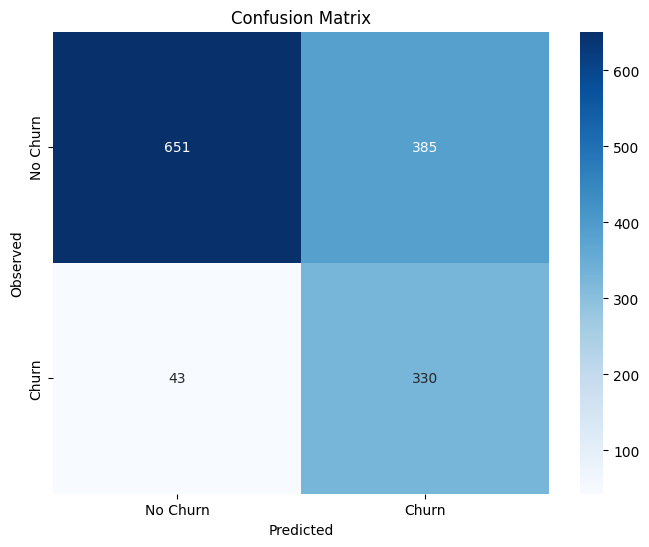

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Confusion Matrix')
plt.show()

#### **Performance Report**

In [31]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
report = classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn'])
print(report)

              precision    recall  f1-score   support

    No Churn       0.94      0.63      0.75      1036
       Churn       0.46      0.88      0.61       373

    accuracy                           0.70      1409
   macro avg       0.70      0.76      0.68      1409
weighted avg       0.81      0.70      0.71      1409



The **Random Forest model** was evaluated using precision, recall, F1-score, and overall accuracy to assess its performance in predicting customer churn. The results indicate that the model performs reasonably well overall, with an **accuracy of 79%**, meaning that it correctly classified 79% of the total 1,409 customers in the dataset.

For the **“No Churn”** class, the model achieved a **precision of 0.82**, indicating that 82% of customers predicted as non-churners were correctly classified. The **recall of 0.91** shows that the model successfully identified 91% of all actual non-churn customers. This high recall demonstrates that the model is particularly strong at recognizing customers who are likely to stay. The corresponding **F1-score of 0.87** reflects a strong balance between precision and recall for this class.

For the **“Churn”** class, performance is comparatively lower. The model achieved a **precision of 0.65**, meaning that 65% of customers predicted to churn actually did so. However, the **recall is 0.46**, indicating that the model only identified 46% of actual churn cases. This suggests that more than half of churners were misclassified as non-churners. The **F1-score of 0.54** confirms moderate performance for detecting churn cases.

The **macro average F1-score of 0.70** reflects moderate overall performance across both classes, while the **weighted average F1-score of 0.78** accounts for class imbalance and indicates stable overall classification ability.

In summary, the Random Forest model performs very well in predicting non-churn customers but is less effective at detecting churn cases. Improving recall for the churn class would enhance the model’s practical value in customer retention strategies.


#### **ROC and AUC Value**

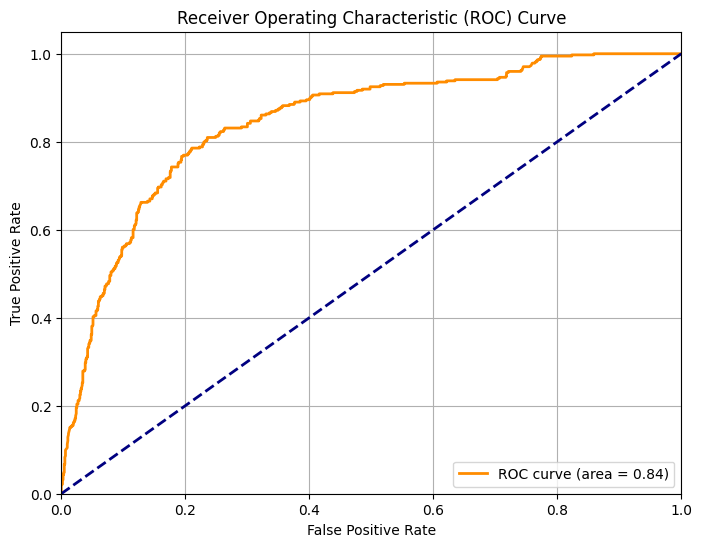

AUC (Area Under the Curve): 0.8449


In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class ('Yes')
# The predict_proba() method returns probabilities for [negative class, positive class]
# So we need the second column (index 1)

# Ensure y_test is in a format that roc_curve can understand (0 or 1)
# If 'No' and 'Yes' are categories, convert them to 0 and 1
# Assuming 'No' maps to 0 and 'Yes' maps to 1 based on previous steps
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc:.4f}")

#### **Features Importance for Top Ten Features**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get feature names from the training data (X_train)
feature_names = X_train.columns

# Create a DataFrame for better handling and visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = importance_df.head(10)
top_10_features

,Feature,Importance
1,tenure,0.056791
10,InternetService_No,0.046609
13,OnlineBackup_No internet service,0.043374
19,StreamingTV_No internet service,0.042795
11,OnlineSecurity_No internet service,0.041327
25,PaperlessBilling_Yes,0.037127
9,InternetService_Fiber optic,0.036236
24,Contract_Two year,0.035903
2,MonthlyCharges,0.033772
15,DeviceProtection_No internet service,0.030053


/tmp/ipython-input-1809891651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


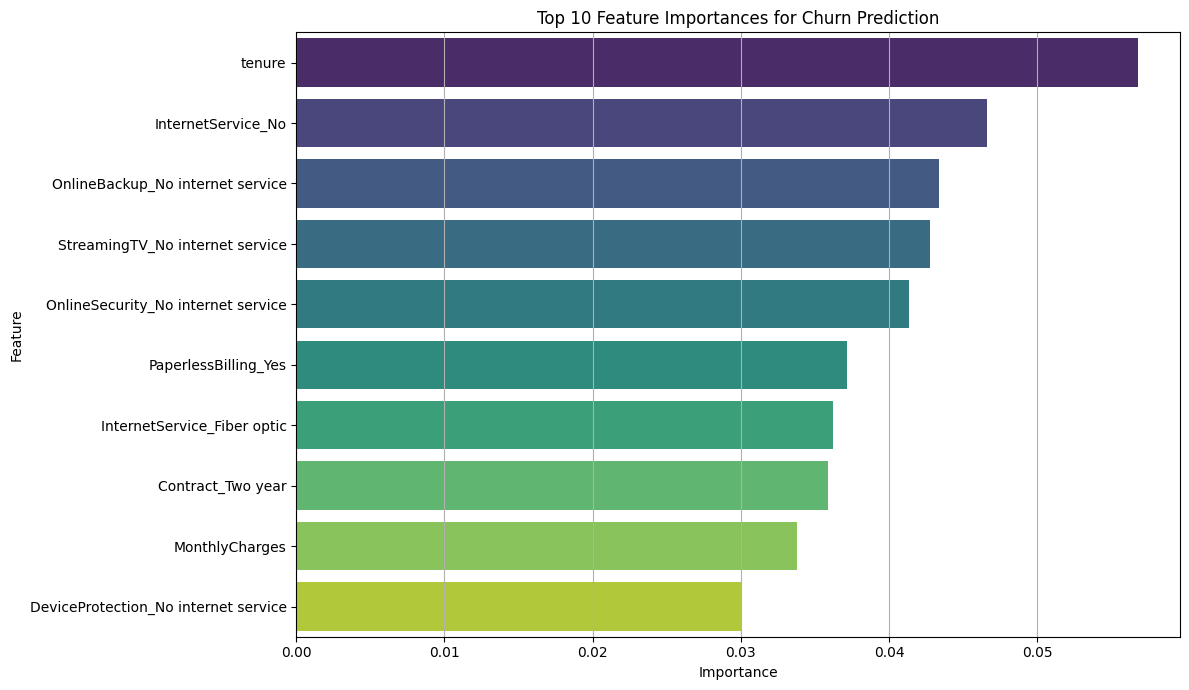

In [34]:
# Plot the top 10 feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### **Plot the Random Forest-One Tree from the Decision Tree**

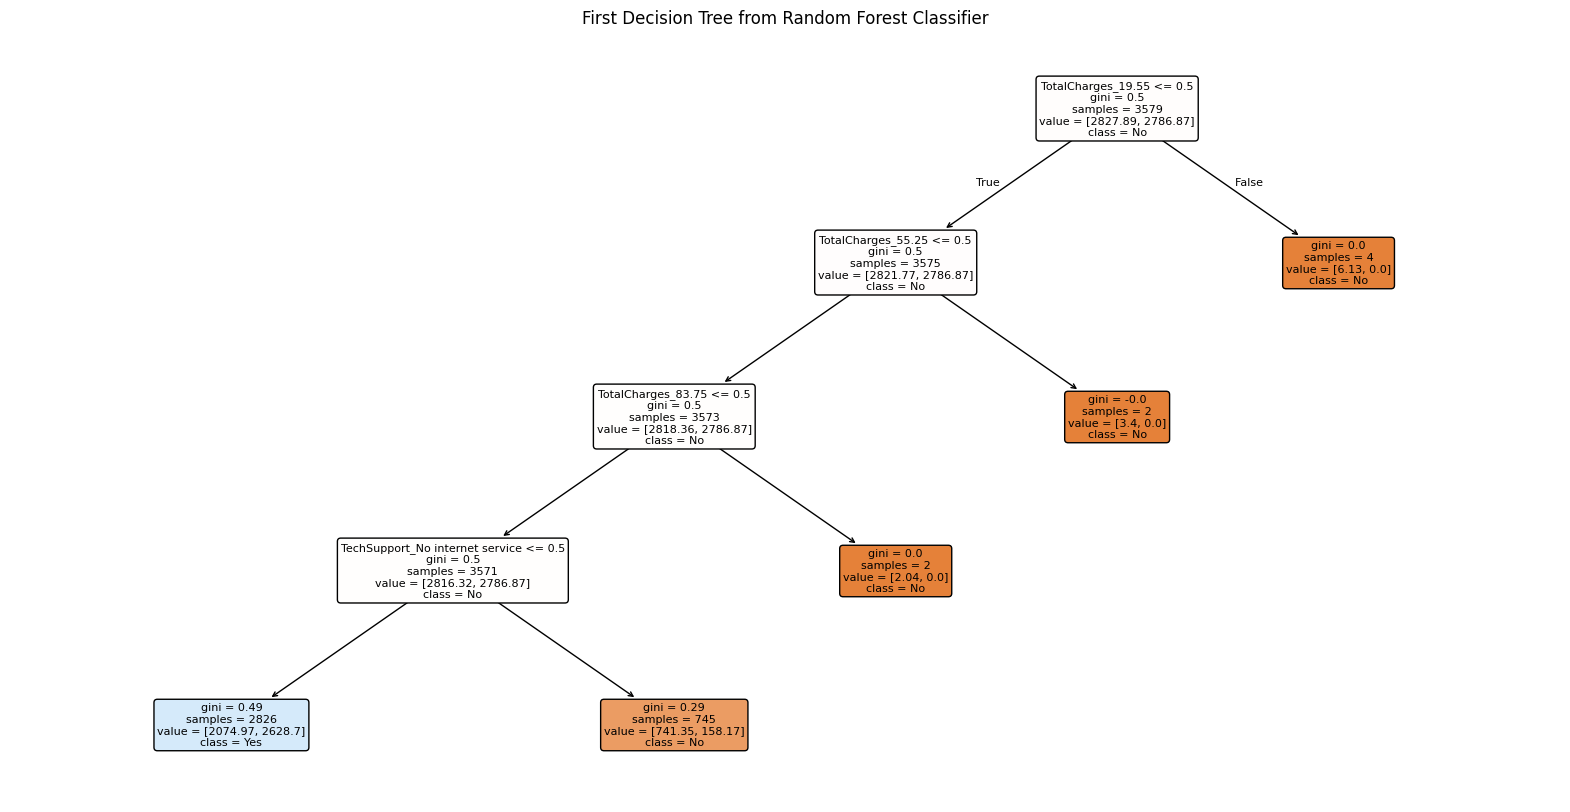

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10)) # Adjust figure size for better readability

# Select one tree from the forest (e.g., the first estimator)
# RandomForestClassifier is an ensemble of DecisionTreeClassifier estimators
tree_to_plot = rf_model.estimators_[3]

plot_tree(tree_to_plot,
          feature_names=X_train.columns.tolist(), # Use actual feature names
          class_names=rf_model.classes_.tolist(),   # Use actual class names ('No', 'Yes')
          filled=True,
          rounded=True,
          precision=2,
          fontsize=8)

plt.title('First Decision Tree from Random Forest Classifier')
plt.show()

#### **Decision Boundary**

In [38]:
top_2_features = top_10_features['Feature'].head(2).tolist()
print(f"Top 2 features for 2D visualization: {top_2_features}")

Top 2 features for 2D visualization: ['tenure', 'InternetService_No']


In [39]:
X_train_2d = X_train[top_2_features]
X_test_2d = X_test[top_2_features]

print("Shape of X_train_2d:", X_train_2d.shape)
print("Shape of X_test_2d:", X_test_2d.shape)
print("X_train_2d head:\n", X_train_2d.head())

Shape of X_train_2d: (5634, 2)
Shape of X_test_2d: (1409, 2)
X_train_2d head:
       tenure  InternetService_No
2142      21                   0
1623      54                   0
6074       1                   0
1362       4                   0
6754       0                   0


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a new Random Forest Classifier for 2D visualization
rf_model_2d = RandomForestClassifier(random_state=42)

# Fit the model to the 2D training data
rf_model_2d.fit(X_train_2d, y_train)

print("2D Random Forest model trained successfully.")

2D Random Forest model trained successfully.


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from the top 2 features for labeling plots
feature1_name = top_2_features[0]
feature2_name = top_2_features[1]

# Define the limits for the meshgrid based on the min/max of the two features in the entire dataset (train + test)
x_min, x_max = pd.concat([X_train_2d[feature1_name], X_test_2d[feature1_name]]).min() - 1, pd.concat([X_train_2d[feature1_name], X_test_2d[feature1_name]]).max() + 1
y_min, y_max = pd.concat([X_train_2d[feature2_name], X_test_2d[feature2_name]]).min() - 1, pd.concat([X_train_2d[feature2_name], X_test_2d[feature2_name]]).max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict probabilities for each point in the meshgrid
Z = rf_model_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

print("Meshgrid created and predictions made for decision boundary visualization.")

Meshgrid created and predictions made for decision boundary visualization.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from the top 2 features for labeling plots
feature1_name = top_2_features[0]
feature2_name = top_2_features[1]

# Define the limits for the meshgrid based on the min/max of the two features in the entire dataset (train + test)
x_min, x_max = pd.concat([X_train_2d[feature1_name], X_test_2d[feature1_name]]).min() - 1, pd.concat([X_train_2d[feature1_name], X_test_2d[feature1_name]]).max() + 1
y_min, y_max = pd.concat([X_train_2d[feature2_name], X_test_2d[feature2_name]]).min() - 1, pd.concat([X_train_2d[feature2_name], X_test_2d[feature2_name]]).max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prepare the meshgrid data as a DataFrame with feature names
# This addresses the UserWarning about feature names
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=top_2_features)

# Predict probabilities for each point in the meshgrid
Z = rf_model_2d.predict_proba(mesh_data)[:, 1]
Z = Z.reshape(xx.shape)

print("Meshgrid created and predictions made for decision boundary visualization.")

Meshgrid created and predictions made for decision boundary visualization.


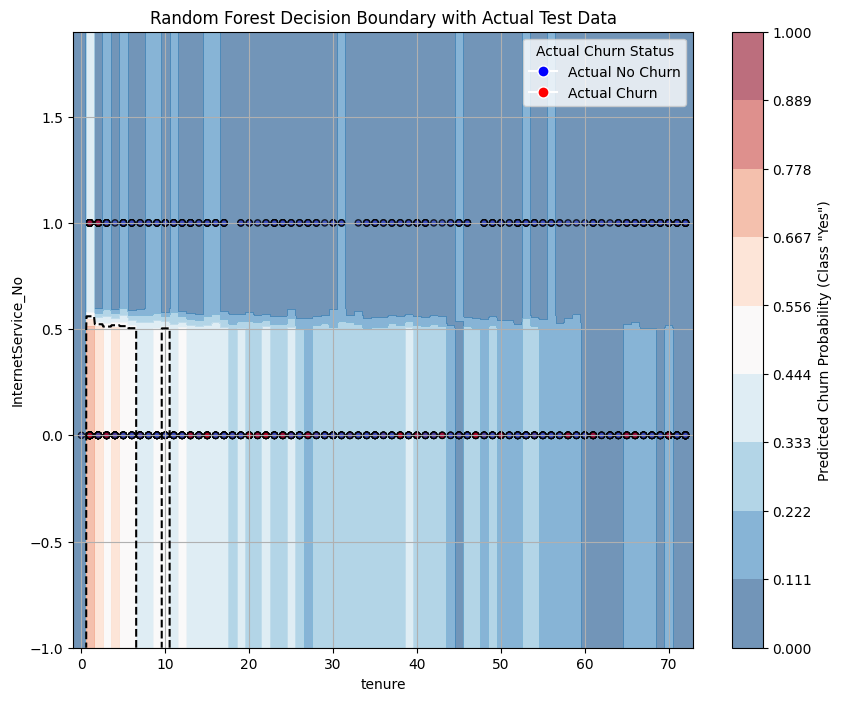

In [43]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 10), cmap='RdBu_r', alpha=0.6)
plt.colorbar(label='Predicted Churn Probability (Class "Yes")')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

# Map y_test ('No', 'Yes') to numeric (0, 1) for consistent plotting
y_test_plot = y_test.map({'No': 0, 'Yes': 1})

# Scatter plot for actual test data points
plt.scatter(X_test_2d[feature1_name], X_test_2d[feature2_name], c=y_test_plot, cmap='coolwarm', edgecolors='k', s=20, alpha=0.8)

plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title('Random Forest Decision Boundary with Actual Test Data')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Actual No Churn', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Actual Churn', markerfacecolor='red', markersize=8)
], title='Actual Churn Status')
plt.grid(True)
plt.show()

This visualization displays a Random Forest classifier's decision boundary for predicting customer churn based on two key features: tenure (x-axis) and monthly charges (y-axis). The color gradient represents the predicted churn probability, ranging from dark blue (0.000, low churn risk) to dark red (1.000, high churn risk).
The plot reveals a clear pattern: customers with shorter tenure and higher monthly charges face the highest churn probability, as evidenced by the dense red regions in the lower-left portion of the plot. Conversely, customers with longer tenure and lower monthly charges (upper-right) show minimal churn risk (predominantly blue).
Actual data points confirm this pattern: red dots (actual churn) cluster in high-risk regions, while blue dots (no churn) concentrate in low-risk areas. Notably, the model identifies a critical threshold around 10-20 months of tenure where churn probability increases significantly for customers paying above $60-70 monthly.

The Random Forest effectively captures non-linear relationships between features, with decision boundaries adapting to complex data patterns rather than following simple linear separations. This visualization demonstrates how the model combines both features to assess risk, highlighting that churn prediction depends on the interaction between tenure and pricing rather than either factor alone.
The plot serves as a valuable diagnostic tool, showing where the model is confident in predictions (solid color regions) versus areas of uncertainty (transitional color zones), aiding in understanding model behavior for customer retention strategies.


# 🚀 **Extreme Gradient Boosting (XGBoost)**

## 1️⃣ Introduction

**Extreme Gradient Boosting (XGBoost)** is an advanced implementation of the Gradient Boosting algorithm designed for speed and performance. It is widely used in machine learning competitions and real-world applications because of its high predictive accuracy and efficiency.

XGBoost builds models sequentially, where each new model corrects the errors made by the previous models. Unlike Random Forest (which builds trees independently), XGBoost builds trees one after another to reduce prediction errors.

---

## 2️⃣ Core Idea: Boosting

Boosting is an ensemble technique that combines weak learners (usually shallow Decision Trees) to create a strong learner.

Instead of averaging predictions (like Random Forest), boosting:

* Builds trees sequentially
* Focuses on reducing previous errors
* Minimizes a loss function using gradient descent

---

## 3️⃣ How XGBoost Works

The process follows these steps:

1. Start with an initial prediction
2. Compute errors (residuals)
3. Train a new tree to predict those errors
4. Add the new tree to the model
5. Repeat until performance stops improving

Final prediction:

For regression:

$$
\hat{y} = \sum_{k=1}^{K} f_k(x)
$$

Where:

* $f_k(x)$ = prediction from tree $k$
* $K$ = total number of trees

---

## 4️⃣ Objective Function

XGBoost minimizes:

$$
\text{Objective} = \text{Loss Function} + \text{Regularization}
$$

Regularization helps prevent overfitting by penalizing model complexity.

---

## 5️⃣ Key Features of XGBoost

* Regularization (L1 & L2)
* Tree pruning
* Parallel processing
* Handling missing values automatically
* Built-in cross-validation
* High computational efficiency

---

## 6️⃣ Important Hyperparameters

| Parameter          | Description                      |
| ------------------ | -------------------------------- |
| `n_estimators`     | Number of trees                  |
| `learning_rate`    | Step size for updates            |
| `max_depth`        | Maximum depth of trees           |
| `subsample`        | Fraction of samples per tree     |
| `colsample_bytree` | Fraction of features per tree    |
| `gamma`            | Minimum loss reduction for split |
| `reg_alpha`        | L1 regularization                |
| `reg_lambda`       | L2 regularization                |

Smaller learning rate + more trees = better performance but slower training.

---

## 7️⃣ Advantages

✅ Very high accuracy
✅ Handles nonlinear relationships
✅ Built-in regularization
✅ Handles missing data
✅ Efficient and scalable

---

## 8️⃣ Disadvantages

❌ More complex to tune
❌ Computationally intensive
❌ Less interpretable than Decision Trees

---

## 9️⃣ XGBoost vs Random Forest

| Feature             | Random Forest | XGBoost            |
| ------------------- | ------------- | ------------------ |
| Tree building       | Parallel      | Sequential         |
| Overfitting control | Averaging     | Regularization     |
| Speed               | Fast          | Faster (optimized) |
| Accuracy            | High          | Very High          |

---

## 🔟 Applications

* Customer churn prediction
* Fraud detection
* Credit scoring
* Medical diagnosis
* Injury and fatigue prediction systems

---

# 📌 Summary

Extreme Gradient Boosting (XGBoost) is a powerful boosting algorithm that:

* Builds trees sequentially
* Minimizes error using gradient descent
* Includes regularization to prevent overfitting
* Achieves state-of-the-art performance in many applications

#### **Fit the XGBoost Model**

In [44]:
import xgboost as xgb

# Convert 'No'/'Yes' labels to 0/1 for XGBoost
y_train_encoded = y_train.map({'No': 0, 'Yes': 1})
y_test_encoded = y_test.map({'No': 0, 'Yes': 1})

# Instantiate the XGBoost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [10:08:26] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### **Prediction using the XGBoost Model**

In [45]:
y_pred_xgb = xgb_model.predict(X_test)
print("First 5 predictions from XGBoost model:", y_pred_xgb[:5])

First 5 predictions from XGBoost model: [1 0 0 1 0]


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb)
recall_xgb = recall_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Print the evaluation metrics
print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")
print(f"Precision (XGBoost): {precision_xgb:.4f}")
print(f"Recall (XGBoost): {recall_xgb:.4f}")
print(f"F1-Score (XGBoost): {f1_xgb:.4f}")
print("\nConfusion Matrix (XGBoost):\n", conf_matrix_xgb)

Accuracy (XGBoost): 0.7885
Precision (XGBoost): 0.6238
Recall (XGBoost): 0.5067
F1-Score (XGBoost): 0.5592

Confusion Matrix (XGBoost):
 [[922 114]
 [184 189]]


#### **Performance Report**

In [47]:
report = classification_report(y_test_encoded, y_pred_xgb, target_names=['No Churn', 'Churn'])
print(report)

              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1036
       Churn       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### **Plotting the confusion matrix**

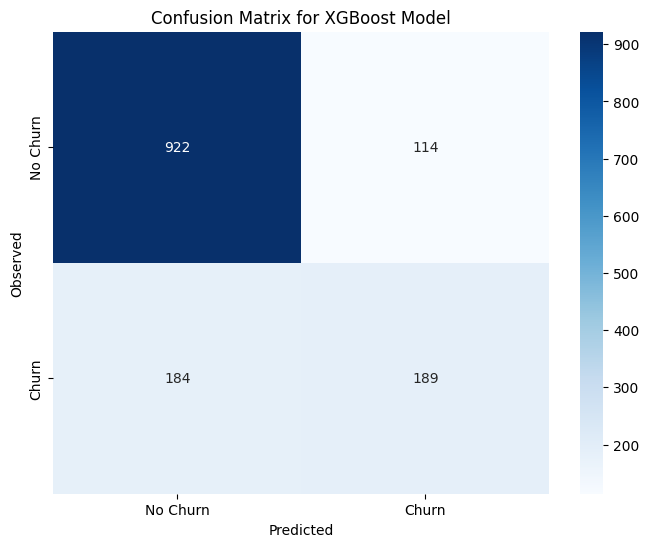

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

### **ROC and AUC value**

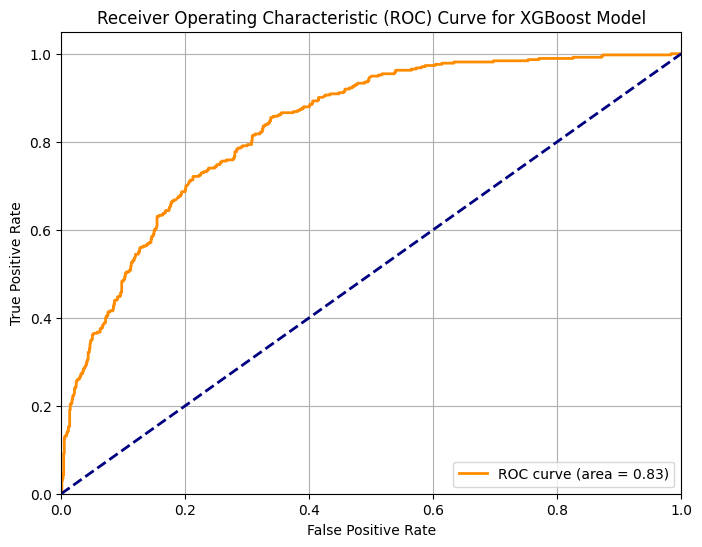

AUC (Area Under the Curve) for XGBoost: 0.8342


In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1 for 'Yes')
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_encoded, y_pred_proba_xgb)

# Calculate AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC (Area Under the Curve) for XGBoost: {roc_auc_xgb:.4f}")

#### **Features Importance Plot**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained XGBoost model
feature_importances_xgb = xgb_model.feature_importances_

# Get feature names from the training data (X_train)
feature_names_xgb = X_train.columns

# Create a DataFrame for better handling and visualization
importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': feature_importances_xgb})

# Sort the features by importance in descending order
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features_xgb = importance_df_xgb.head(10)

# Print the top 10 feature importances
print("Top 10 Feature Importances for XGBoost Model:")
top_10_features_xgb

Top 10 Feature Importances for XGBoost Model:


,Feature,Importance
9,InternetService_Fiber optic,0.319854
24,Contract_Two year,0.185819
10,InternetService_No,0.110272
23,Contract_One year,0.070921
22,StreamingMovies_Yes,0.027943
6,PhoneService_Yes,0.025964
1,tenure,0.021686
1513,TotalCharges_19.55,0.019096
27,PaymentMethod_Electronic check,0.018037
25,PaperlessBilling_Yes,0.017533


/tmp/ipython-input-2993644115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features_xgb, palette='viridis')


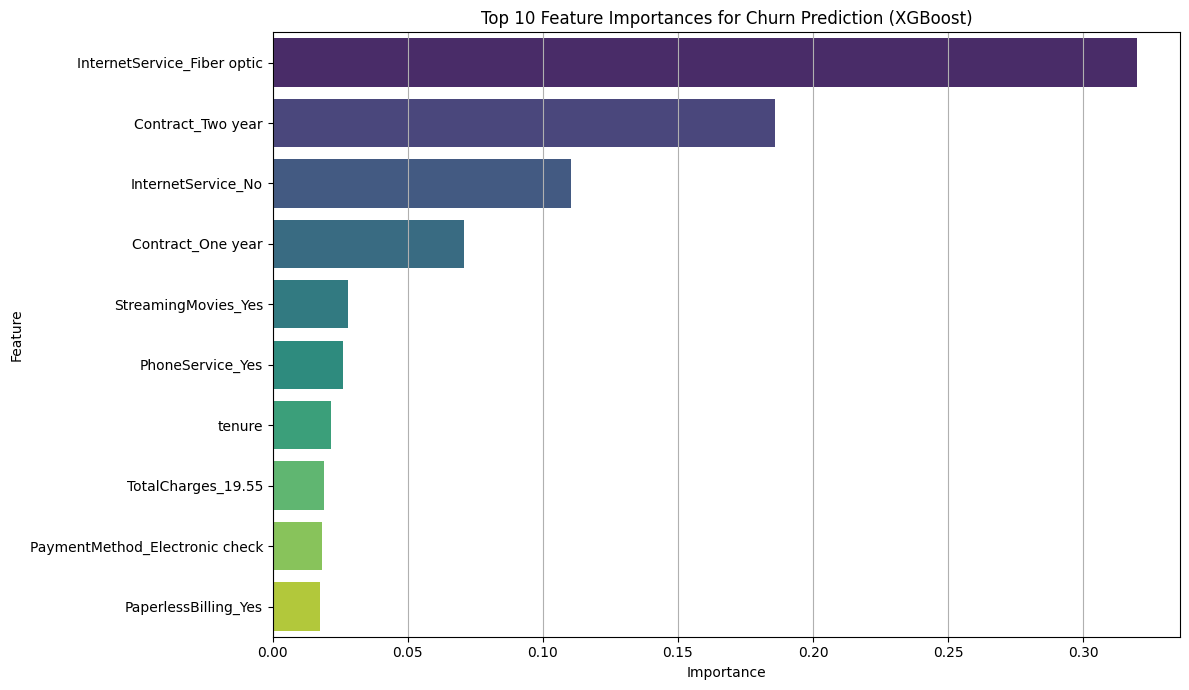

In [51]:
# Plot the top 10 feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=top_10_features_xgb, palette='viridis')
plt.title('Top 10 Feature Importances for Churn Prediction (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### **Model's Comparison**

##### **Random Forest**

In [61]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

# 1. Convert predictions from categorical to numeric (Yes=1, No=0)
y_pred_rf_numeric = np.array([1 if pred == 'Yes' else 0 for pred in y_pred_rf])

# 2. Compute Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf_numeric)

# 3. Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix_rf.ravel()

# 4. Sensitivity (Recall / True Positive Rate)
sensitivity = TP / (TP + FN)

# 5. Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# 6. False Positive Rate
fpr = FP / (FP + TN)

# 7. False Negative Rate
fnr = FN / (FN + TP)

# 8. Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test_encoded, y_pred_rf_numeric)

# 9. No Information Rate (majority class proportion)
nir = y_test_encoded.value_counts().max() / len(y_test_encoded)

# 10. McNemar's Test
mcnemar_result = mcnemar(conf_matrix_rf, exact=False, correction=True)
mcnemar_p_value = mcnemar_result.pvalue

# 11. Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2

# 12. Print Results
print(f"Specificity (TNR): {specificity:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print(f"McNemar's Test P-Value: {mcnemar_p_value:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"No Information Rate (NIR): {nir:.4f}")

Specificity (TNR): 0.6284
Sensitivity (TPR): 0.8847
False Positive Rate (FPR): 0.3716
False Negative Rate (FNR): 0.1153
Cohen's Kappa: 0.3967

Confusion Matrix:
 [[651 385]
 [ 43 330]]
McNemar's Test P-Value: 0.0000
Balanced Accuracy: 0.7565
No Information Rate (NIR): 0.7353


##### **Extreme Gradient Boosting**



In [62]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# 1. Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# 2. Extract TN, FP, FN, TP
TN_xgb, FP_xgb, FN_xgb, TP_xgb = conf_matrix_xgb.ravel()

# 3. Sensitivity (Recall / TPR)
sensitivity_xgb = TP_xgb / (TP_xgb + FN_xgb)

# 4. Specificity (TNR)
specificity_xgb = TN_xgb / (TN_xgb + FP_xgb)

# 5. False Positive Rate
fpr_xgb = FP_xgb / (FP_xgb + TN_xgb)

# 6. False Negative Rate
fnr_xgb = FN_xgb / (FN_xgb + TP_xgb)

# 7. Balanced Accuracy
balanced_accuracy_xgb = (sensitivity_xgb + specificity_xgb) / 2

# 8. Cohen's Kappa
cohen_kappa_xgb = cohen_kappa_score(y_test_encoded, y_pred_xgb)

# 9. No Information Rate (NIR)
nir_xgb = y_test_encoded.value_counts().max() / len(y_test_encoded)

# 10. McNemar's Test
mcnemar_result_xgb = mcnemar(conf_matrix_xgb, exact=False, correction=True)
mcnemar_p_value_xgb = mcnemar_result_xgb.pvalue

# Print Results
print(f"Sensitivity (TPR) (XGBoost): {sensitivity_xgb:.4f}")
print(f"Specificity (TNR) (XGBoost): {specificity_xgb:.4f}")
print(f"False Positive Rate (FPR) (XGBoost): {fpr_xgb:.4f}")
print(f"False Negative Rate (FNR) (XGBoost): {fnr_xgb:.4f}")
print(f"Cohen's Kappa (XGBoost): {cohen_kappa_xgb:.4f}")
print(f"Balanced Accuracy (XGBoost): {balanced_accuracy_xgb:.4f}")
print(f"NIR (XGBoost): {nir_xgb:.4f}")
print(f"McNemar P-Value (XGBoost): {mcnemar_p_value_xgb:.4f}")
print("\nConfusion Matrix (XGBoost):\n", conf_matrix_xgb)

Sensitivity (TPR) (XGBoost): 0.5067
Specificity (TNR) (XGBoost): 0.8900
False Positive Rate (FPR) (XGBoost): 0.1100
False Negative Rate (FNR) (XGBoost): 0.4933
Cohen's Kappa (XGBoost): 0.4220
Balanced Accuracy (XGBoost): 0.6983
NIR (XGBoost): 0.7353
McNemar P-Value (XGBoost): 0.0001

Confusion Matrix (XGBoost):
 [[922 114]
 [184 189]]


##### **Present the Results above in a Date Frame**

In [65]:
comparison_df = pd.DataFrame({
    "Metric": [
        "Sensitivity (TPR)",
        "Specificity (TNR)",
        "False Positive Rate (FPR)",
        "False Negative Rate (FNR)",
        "Balanced Accuracy",
        "Cohen's Kappa",
        "No Information Rate (NIR)",
        "McNemar P-Value"
    ],
    "Random Forest": [
        sensitivity,
        specificity,
        fpr,
        fnr,
        balanced_accuracy,
        cohen_kappa,
        nir,
        mcnemar_p_value
    ],
    "XGBoost": [
        sensitivity_xgb,
        specificity_xgb,
        fpr_xgb,
        fnr_xgb,
        balanced_accuracy_xgb,
        cohen_kappa_xgb,
        nir_xgb,
        mcnemar_p_value_xgb
    ]
})


In [70]:
#pd.set_option('display.float_format', '{:.6f}'.format)
comparison_df

,Metric,Random Forest,XGBoost
0,Sensitivity (TPR),0.884718,0.506702
1,Specificity (TNR),0.628378,0.889961
2,False Positive Rate (FPR),0.371622,0.110039
3,False Negative Rate (FNR),0.115282,0.493298
4,Balanced Accuracy,0.756548,0.698332
5,Cohen's Kappa,0.396708,0.422005
6,No Information Rate (NIR),0.735273,0.735273
7,McNemar P-Value,0.000000,0.000064


Random Forest is better at detecting churners (high sensitivity), while XGBoost is better at correctly identifying non-churners (high specificity); the best model depends on business priorities.

The results show a clear trade-off between **Random Forest (RF)** and **XGBoost** in terms of error distribution and classification performance.

**Sensitivity (True Positive Rate)** measures the proportion of actual churners correctly identified. RF achieves a very high sensitivity (0.8847), meaning it correctly detects about 88% of churners. In contrast, XGBoost records a much lower sensitivity (0.5067), identifying only about 51% of churners. Since churn prediction aims to proactively retain customers, failing to detect churners (false negatives) is costly. Therefore, in terms of recall of the minority class, RF clearly outperforms XGBoost.

**Specificity (True Negative Rate)** measures the proportion of non-churners correctly classified. Here, XGBoost performs strongly (0.8900), compared to RF (0.6284). This means XGBoost is much better at avoiding false alarms. If retention campaigns are expensive, high specificity is beneficial because it prevents targeting customers who would not have churned.

The **False Positive Rate (FPR)** and **False Negative Rate (FNR)** further illustrate this trade-off. RF has a high FPR (0.3716), meaning it incorrectly flags many non-churners as churners. However, it has a low FNR (0.1153), meaning very few churners are missed. XGBoost shows the opposite behavior: very low FPR (0.1100) but very high FNR (0.4933). In business terms, RF prioritizes capturing churners at the expense of more false alarms, whereas XGBoost minimizes false alarms but misses nearly half of actual churners.

**Balanced Accuracy**, which averages sensitivity and specificity, is higher for RF (0.7565) than for XGBoost (0.6983). This suggests that overall class-wise performance favors RF, especially in an imbalanced dataset.

**Cohen’s Kappa**, which measures agreement beyond chance, is slightly higher for XGBoost (0.4220) compared to RF (0.3967). Although the difference is modest, it indicates that XGBoost achieves slightly better overall consistency relative to random classification.

The **No Information Rate (NIR)** is identical for both models (0.7353), representing the accuracy obtained by always predicting the majority class. Since both models exceed this baseline, they provide meaningful predictive power.

Finally, **McNemar’s test** yields statistically significant p-values for both models, suggesting that classification errors are not randomly distributed.

**Conclusion:** For churn detection, sensitivity is typically more critical than specificity because missing a churner directly leads to revenue loss. Given its substantially higher sensitivity and better balanced accuracy, Random Forest is the preferable model for proactive retention strategies. XGBoost may be preferred only if minimizing false positives is the primary objective.
